In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Enable plots inside notebook
%matplotlib inline

print("Libraries imported successfully!")


Libraries imported successfully!


In [4]:
import pandas as pd

# New, working URL for the Boston Housing dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'

# Read the CSV file from the URL into a DataFrame
df = pd.read_csv(url)

# Display the first 5 rows and info to confirm it's working
print("Success! The new dataset loaded correctly.")
print(df.head())

Success! The new dataset loaded correctly.
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

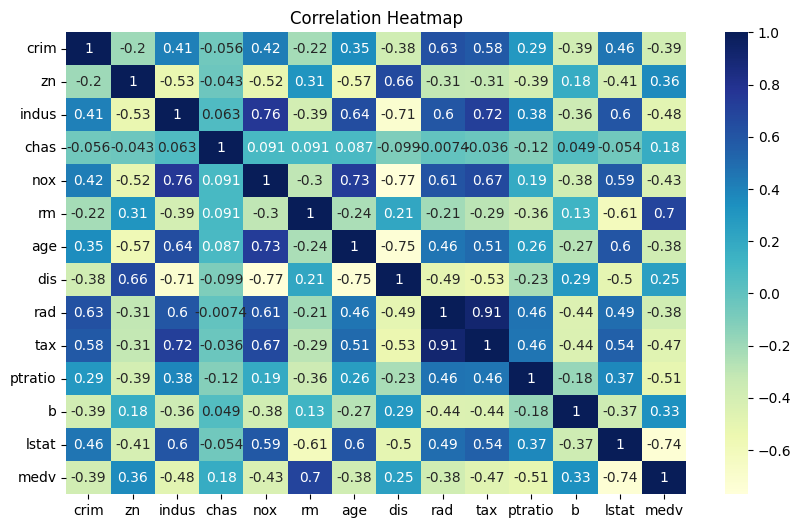

In [5]:
# Summary stats
print(df.describe())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()


In [6]:
# Select features (X) and target (y)
X = df[['rm', 'lstat', 'ptratio']]  # Input features
y = df['medv']                      # Target variable


In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (404, 3)
Testing data shape: (102, 3)


In [8]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


In [9]:
# Predict house prices for test data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Evaluation Results:")
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("R² Score:", round(r2, 2))


📊 Evaluation Results:
Mean Absolute Error (MAE): 3.33
Mean Squared Error (MSE): 27.11
R² Score: 0.63


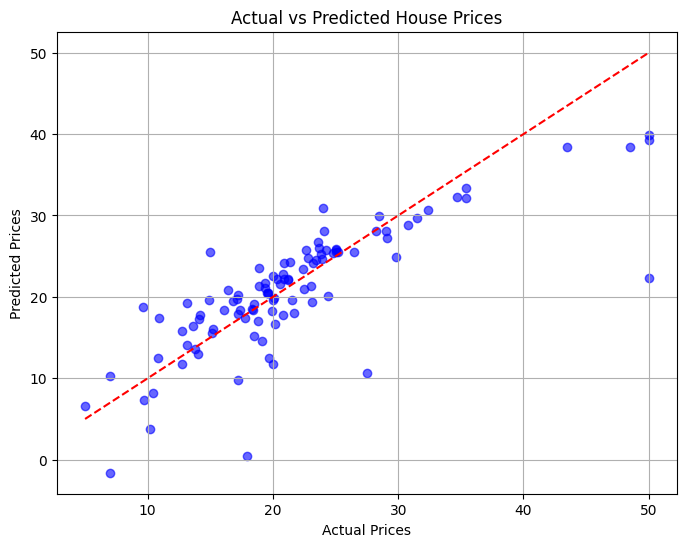

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()


In [11]:
# View model coefficients (slopes)
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("📌 Feature Coefficients:")
print(coeff_df)

# View intercept (base price without any features)
print("\n📌 Intercept (Base Price):")
print(model.intercept_)


📌 Feature Coefficients:
         Coefficient
rm          4.933118
lstat      -0.567126
ptratio    -0.867095

📌 Intercept (Base Price):
14.58809926157104
